## `19IT031 Aman Desai`
## Practical - 3  `Linear regression`

# Linear Regression

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Why you want to apply regression on selected dataset? Discuss full story behind dataset.

#### Ans: 
Here i have the data of a company which sells pre-owned cars. From the parameters like Fuel type, Kms driven and many more others we need to make a linear regression model which can predict the Selling price based on the independent factors

In [2]:
# Loading the dataset
import pandas as pd
dataset = pd.read_csv('car data.csv')
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
dataset.shape

(301, 9)

### 2. How many total observations in data?
#### Ans:
Here in the dataset there are 301 observation and 9 variables.

### 3. How many independent variables?
#### Ans:
Their are total 8 independent variables. 

### 4. Which is dependent variable?
#### Ans:
The dependent variable is "Selling Price" which we want to predict based on independent variables.

### 5. Which are most useful variable in estimation? Prove using correlation.

Before ploting the heatmap we need to encode the values of variables into numerical format.
Here `Fuel_Type`, `Seller_Type` and `Transmission` are not in numerical format.

Now lets first examine the different values asssociated with variables along with their counts.

In [4]:
print(dataset.Fuel_Type.value_counts())
print(dataset.Seller_Type.value_counts())
print(dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


From above we can observe that "Fuel_Type" has 3 different values `Petrol`,`Diesel` and `CNG` similarly we can observe for other variables. Now we need to assign a numerical value to each category and perform encoding.

In [5]:
# encoding "Fuel_Type" Column
dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

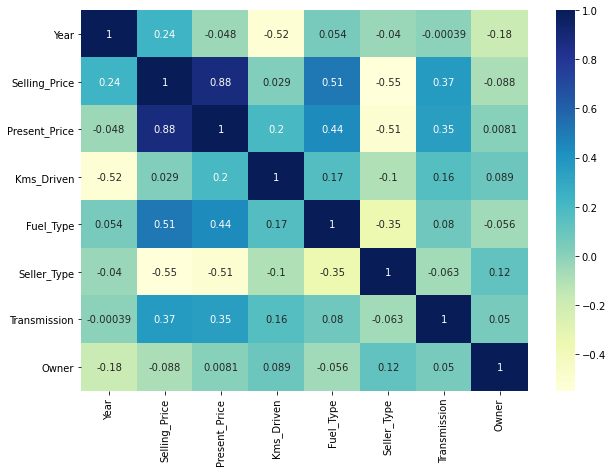

In [6]:
plt.figure(figsize = (10,7))
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot = True)
plt.show()

Here from the heatmap we can conclude that `Present_Price` is the main factor or say most useful independent variable in estimating the selling price of the car

In [7]:
from sklearn.model_selection import train_test_split

X = dataset['Present_Price']
Y = dataset['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(270,)
(270,)
(31,)
(31,)


### 6. Implement linear regression using OLS method.

In [9]:
X_train_sm = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train_sm).fit()

lm.params
# lm.predict(X_test)


const            0.737150
Present_Price    0.511996
dtype: float64

In [10]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     880.0
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           1.21e-86
Time:                        16:36:31   Log-Likelihood:                -632.39
No. Observations:                 270   AIC:                             1269.
Df Residuals:                     268   BIC:                             1276.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7371      0.204      3.606

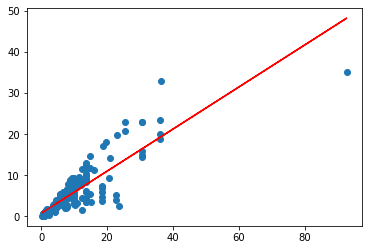

In [11]:
y_OLS_pred = 0.7371 + (X_train * 0.5120)

plt.scatter(X_train, y_train)
plt.plot(X_train, y_OLS_pred, 'r')
plt.show()

In [12]:
#  now lets predict the values from the X_test and try to plot the value and see how well it works

X_test_sm = sm.add_constant(X_test)

y_test_pred = lm.predict(X_test_sm)
y_test_pred.head()

99     11.207468
161     1.160058
89      4.198243
30      3.798886
232     8.309570
dtype: float64

In [13]:
print(y_test_pred.shape)
print(y_test.shape)

(31,)
(31,)


In [14]:
RMSE = sqrt(mean_squared_error(y_test, y_test_pred))
SSE = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("RMSE = ", RMSE)
print("SSE = ", SSE)
print("r2_score = ", r2)

RMSE =  1.2938162578416224
SSE =  1.6739605090552996
r2_score =  0.8727685263353028


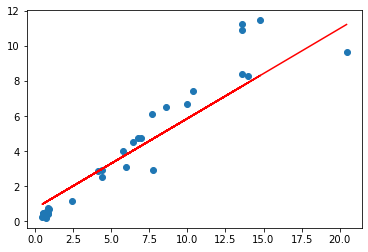

In [15]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 0.5120 * X_test + 0.7371, 'r')
plt.show()

### 7. Implement linear regression using Gradient Descent from scratch.

m = 0.5119960050726422
c = 0.7371495123303085
RMSE =  2.5174347608811307
SSE =  6.337477775292636
r2_score =  0.7665426063058748


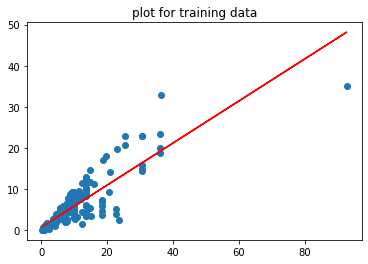

In [24]:
Y = y_train
X = X_train

m = 0
c = 0
L = 0.001   # Learning rate
epochs = 50000   # The number of iterations to perform

n = float(len(X))   # Number of elements in X

# performing Gradient Descent
for i in range(epochs):
    Y_pred = m*X + c                         # the Current predicted values
    # print(m)
    D_m = (-2/n) * sum(X * (Y - Y_pred))     # partial derivative wtr m
    D_c = (-2/n) * sum(Y - Y_pred)           # partial derative wrt c
    m -= L * D_m
    c -= L * D_c
    
print(f"m = {m}\nc = {c}")

y_GD_pred = m * X + c

RMSE = sqrt(mean_squared_error(Y, y_GD_pred))
SSE = mean_squared_error(Y, y_GD_pred)
r2 = r2_score(Y, y_GD_pred)

print("RMSE = ", RMSE)
print("SSE = ", SSE)
print("r2_score = ", r2)

plt.title("plot for training data")
plt.scatter(X, Y)
plt.plot(X, y_GD_pred, 'r')
plt.show()

### 8. Implement linear regression using sklearn API.

RMSE =  2.4197292177124603
SSE =  5.855089487051356
r2_score =  0.7726103146985799


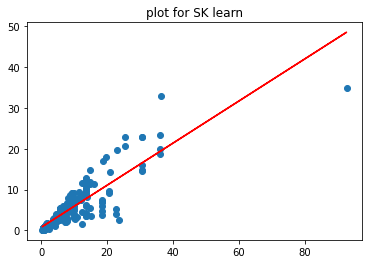

In [17]:
y = dataset['Selling_Price']
x = pd.DataFrame(dataset['Present_Price'])

lm = LinearRegression().fit(x,y)
y_sk_pred = lm.predict(x)

RMSE = sqrt(mean_squared_error(y, y_sk_pred))
SSE = mean_squared_error(y, y_sk_pred)
r2 = r2_score(y, y_sk_pred)

print("RMSE = ", RMSE)
print("SSE = ", SSE)
print("r2_score = ", r2)

plt.title("plot for SK learn")
plt.scatter(x, y)
plt.plot(x, y_sk_pred, 'r')
plt.show()

### 9. Quantify goodness of your model and discuss steps taken for improvement (RMSE, MSE, R2Score).

* **RMSE:** A metric that tells us how far apart the predicted values are from the observed values in
    a dataset, on average. The lower the RMSE, the better a model fits a dataset.
    

* **R2score:** A metric that tells us the proportion of the variance in the response variable of a
    regression model that can be explained by the predictor variables. This value ranges from 0 to 1.
    The higher the R2 value, the better a model fits a dataset.
    

* **MSE (Mean Squared Error):** represents the difference between the original and predicted
values which are extracted by squaring the average difference over the data set. It is a measure
of how close a fitted line is to actual data points. The lesser the Mean Squared Error, the closer
the fit is to the data set. The MSE has the units squared of whatever is plotted on the vertical
axis

In [18]:
Y = dataset['Selling_Price']
X = dataset['Present_Price']

# OSL method
RMSE = sqrt(mean_squared_error(y_test, y_test_pred))
SSE = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print("OLS")
print("RMSE = ", RMSE)
print("SSE = ", SSE)
print("r2_score = ", r2)

# gradient descent
RMSE = sqrt(mean_squared_error(y_train, y_GD_pred))
SSE = mean_squared_error(y_train, y_GD_pred)
r2 = r2_score(y_train, y_GD_pred)
print("\nGradient Descent")
print("RMSE = ", RMSE)
print("SSE = ", SSE)
print("r2_score = ", r2)

# sk-learn
RMSE = sqrt(mean_squared_error(Y, y_sk_pred))
SSE = mean_squared_error(Y, y_sk_pred)
r2 = r2_score(Y, y_sk_pred)
print("\nSKlearn")
print("RMSE = ", RMSE)
print("SSE = ", SSE)
print("r2_score = ", r2)

OLS
RMSE =  1.2938162578416224
SSE =  1.6739605090552996
r2_score =  0.8727685263353028

Gradient Descent
RMSE =  2.518049215045245
SSE =  6.340571849389975
r2_score =  0.766428628079793

SKlearn
RMSE =  2.4197292177124603
SSE =  5.855089487051356
r2_score =  0.7726103146985799


### 10. Discuss comparison of different methods.

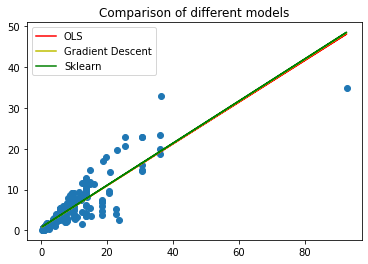

In [19]:
plt.title("Comparison of different models")
plt.scatter(X, Y)
plt.plot(X_train, y_OLS_pred, 'r', label="OLS")
plt.plot(X_train, y_GD_pred, 'y', label="Gradient Descent")
plt.plot(x, y_sk_pred, 'g', label="Sklearn")
plt.legend()
plt.show()

## Conclusion

By performing this practical i got to know about, linear regression a supervised learning algorithm. Here i have used car data to predict the car selling price from the given data using different techniques like OLS, Gradient Descent, and Sklearn. Also calculated RMSE, SEE and r2 score of the model. 